#### [과제]

-[1] 타이타닉

 -> 생존자 중 성별 비율 시각화

 -> 생존자 나이별 성별 비율 비교 시각화 (10대 남/녀 , 20대 남/녀) -> 하나의 Figure에 모두 표시


-[2] 시도별 전출입 인구수 

	-> 1970 ~ 2017년 이동 인구수

	-> 대구 ===> 타지역으로 이동 인구수 분석 및 시각화 (연도별)

	-> 전국으로 봤을 때 가장 많이 이동이 발생한 지역

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [359]:
# 데이터 준비
file_name=r'C:\Users\kdp\Desktop\KDT\EX_PANDAS06\data\titanic.csv'
titanDF=pd.read_csv(file_name)
# - 기본 정보 확인
titanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [360]:
# [5] 분석 주제 ==> 성별에 따른 나이 분포
# - 분석 컬럼 즉, 성별과 나이 컬럼
# - loc[행,열]
gender_survivedDF=titanDF.loc[:,['sex','survived']]            # OR dataDF[['sex','age']]

In [361]:
titanDF[['sex','survived']]

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [362]:
gender_survivedDF.isna().sum()

sex         0
survived    0
dtype: int64

In [363]:
# 생존자 중 성별이 여자
bool_index1=(gender_survivedDF['survived']==1) & (gender_survivedDF['sex']=='female')
gender_survivedDF[bool_index1].count()

sex         233
survived    233
dtype: int64

In [364]:
# 생존자 중 성별이 남자
bool_index2=(gender_survivedDF['survived']==1) & (gender_survivedDF['sex']=='male')
gender_survivedDF[bool_index2].count()

sex         109
survived    109
dtype: int64

In [365]:
# 한글 폰트 설정 ->폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

# set_custonFont(r'C:\Windows\Fonts\batang.ttc')

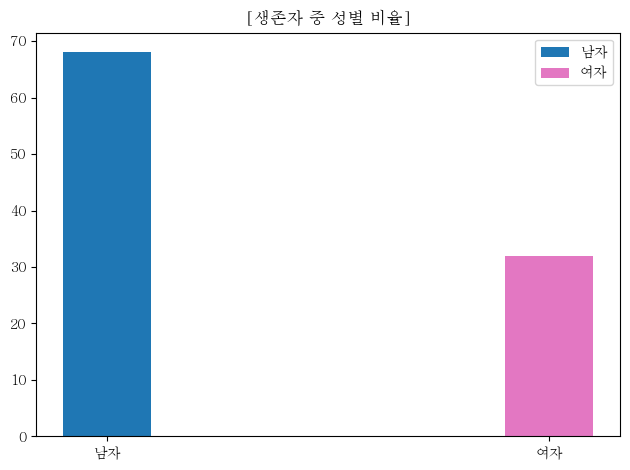

In [366]:
# 데이터 시각화 - 수직 막대 그래프
gender = ['남자','여자']
survived = [(233/342)*100, (109/342)*100]
bar_labels =['blue','pink']
bar_colors = ['tab:blue', 'tab:pink']


plt.bar(gender,survived, width=0.2, color=bar_colors,label=gender,align='center')
plt.title('[생존자 중 성별 비율]')

plt.legend()
plt.tight_layout()              # 모든 내용 출력 될 수 있도록 자동 맞춤 설정
plt.show()

####[생존자 나이별 성별 비율 비교 시각화 (10대 남/녀 , 20대 남/녀) -> 하나의 Figure에 모두 표시]

In [367]:

age_survivedDF=titanDF.loc[:,['age','survived','sex']]   
age_survivedDF


,age,survived,sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male
...,...,...,...
886,27.0,0,male
887,19.0,1,female
888,NaN,0,female
889,26.0,1,male


In [368]:
# 나이 결측값 확인
age_survivedDF['age'].isna().sum()

177

In [369]:
# 생존자 중 나이를 모르는 사람 16명
(age_survivedDF['age'].isna().sum())&(age_survivedDF['survived']==1).sum()


16

In [370]:
# 결측값 삭제
# 생존자들의 나이별 성별 분석인데 결측치를 0이나 평균으로 매꾸는것은
# 부적절하다고 판단
age_survivedDF.dropna()

,age,survived,sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male
...,...,...,...
885,39.0,0,female
886,27.0,0,male
887,19.0,1,female
889,26.0,1,male


In [371]:
# 생존자 중 10대 여성 34명
# 342명 중 34명
bool_index10girl = (age_survivedDF['age'] <20) & (age_survivedDF['age'] >= 10) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index10girl].count()



age         34
survived    34
sex         34
dtype: int64

In [372]:
# 생존자 중 10대 남성 7명
# 342명 중 7명
bool_index10man = (age_survivedDF['age'] <20) & (age_survivedDF['age'] >= 10) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index10man].count()

age         7
survived    7
sex         7
dtype: int64

In [373]:
# 생존자 중 20대 여성 52명
# 342명 중 52명
bool_index20girl = (age_survivedDF['age'] <30) & (age_survivedDF['age'] >= 20) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index20girl].count()

age         52
survived    52
sex         52
dtype: int64

In [374]:
# 생존자 중 20대 남성 25명
# 342명 중 25명
bool_index20man = (age_survivedDF['age'] <30) & (age_survivedDF['age'] >= 20) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index20man].count()

age         25
survived    25
sex         25
dtype: int64

In [375]:
# 생존자 중 30대 여성 50명
# 342명 중 50명
bool_index30girl = (age_survivedDF['age'] <40) & (age_survivedDF['age'] >= 30) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index30girl].count()

age         50
survived    50
sex         50
dtype: int64

In [376]:
# 생존자 중 30대 남성 23명
# 342명 중 23명
bool_index30man = (age_survivedDF['age'] <40) & (age_survivedDF['age'] >= 30) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index30man].count()

age         23
survived    23
sex         23
dtype: int64

In [377]:
# 생존자 중 40대 여성 22명
# 342명 중 22명
bool_index40girl = (age_survivedDF['age'] <50) & (age_survivedDF['age'] >= 40) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index40girl].count()

age         22
survived    22
sex         22
dtype: int64

In [378]:
# 생존자 중 40대 남성 12명
# 342명 중 12명
bool_index40man = (age_survivedDF['age'] <50) & (age_survivedDF['age'] >= 40) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index40man].count()

age         12
survived    12
sex         12
dtype: int64

In [379]:
# 생존자 중 50대 여성 16명
# 342명 중 16명
bool_index50girl = (age_survivedDF['age'] <60) & (age_survivedDF['age'] >= 50) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index50girl].count()

age         16
survived    16
sex         16
dtype: int64

In [380]:
# 생존자 중 50대 남성 4명
# 342명 중 4명
bool_index50man = (age_survivedDF['age'] <60) & (age_survivedDF['age'] >= 50) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index50man].count()


age         4
survived    4
sex         4
dtype: int64

In [381]:
# 생존자 중 60대 여성 4명
# 342명 중 4명
bool_index60girl = (age_survivedDF['age'] <70) & (age_survivedDF['age'] >= 60) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index60girl].count()

age         4
survived    4
sex         4
dtype: int64

In [382]:
# 생존자 중 60대 남성 2명
# 342명 중 2명
bool_index60man = (age_survivedDF['age'] <70) & (age_survivedDF['age'] >= 60) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index60man].count()

age         2
survived    2
sex         2
dtype: int64

In [383]:
# 생존자 중 70대 여성 0명
# 342명 중 0 명
bool_index70girl = (age_survivedDF['age'] <80) & (age_survivedDF['age'] >= 70) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index70girl].count()

age         0
survived    0
sex         0
dtype: int64

In [384]:
# 생존자 중 70대 남성 0명
# 342명 중 0명
bool_index70man = (age_survivedDF['age'] <80) & (age_survivedDF['age'] >= 70) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index70man].count()

age         0
survived    0
sex         0
dtype: int64

In [385]:
# 생존자 중 80대 여성 0명
# 342명 중 0 명
bool_index80girl = (age_survivedDF['age'] <90) & (age_survivedDF['age'] >= 80) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='female')
age_survivedDF[bool_index80girl].count()

age         0
survived    0
sex         0
dtype: int64

In [386]:
# 생존자 중 80대 남성 1명
# 342명 중 1 명
bool_index80man = (age_survivedDF['age'] <90) & (age_survivedDF['age'] >= 80) & (age_survivedDF['survived']==1) & (age_survivedDF['sex']=='male')
age_survivedDF[bool_index80man].count()

age         1
survived    1
sex         1
dtype: int64

In [387]:
# 10,20대 그래프
gender = ['10대남성', '10대여성','20대남성','20대여성']
counts = [7,34,52,25]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

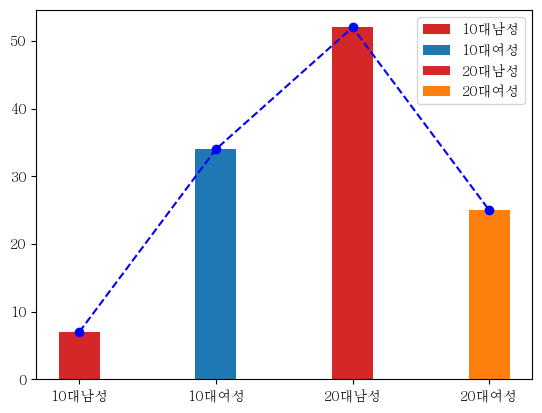

In [388]:
# [3] 데이터 시각화 - 수직막대그래프
plt.bar(gender,counts, width=0.3, color=bar_colors,label=gender)
plt.plot(counts,'bo--')
plt.legend()
plt.show()

In [389]:
# 30대 40대 그래프
gender = ['30대남성', '30대여성','40대남성','40대여성']
counts = [23,50,12,22]
bar_labels = ['green', 'skyblue', '_green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

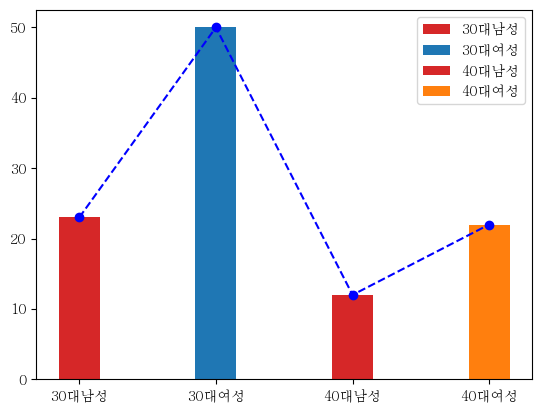

In [390]:
# [3] 데이터 시각화 - 수직막대그래프
plt.bar(gender,counts, width=0.3, color=bar_colors,label=gender)
plt.plot(counts,'bo--')
plt.legend()
plt.show()

In [391]:
# 50,60대 그래프
gender = ['50대남성', '50대여성','60대남성','60대여성']
counts = [4,16,2,4]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

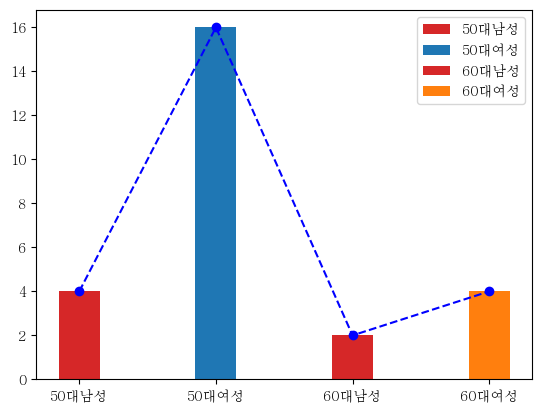

In [392]:
# [3] 데이터 시각화 - 수직막대그래프
plt.bar(gender,counts, width=0.3, color=bar_colors,label=gender)
plt.plot(counts,'bo--')
plt.legend()

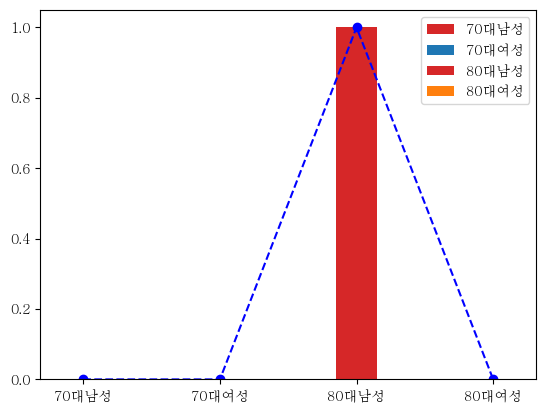

In [393]:
# 70,80대 그래프
gender = ['70대남성', '70대여성','80대남성','80대여성']
counts = [0,0,1,0]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
# [3] 데이터 시각화 - 수직막대그래프
plt.bar(gender,counts, width=0.3, color=bar_colors,label=gender)
plt.plot(counts,'bo--')
plt.legend()

-[2] 시도별 전출입 인구수 

	-> 1970 ~ 2017년 이동 인구수

	-> 대구 ===> 타지역으로 이동 인구수 분석 및 시각화 (연도별)

In [395]:
# 데이터 준비
file_name1=r'C:\Users\kdp\Desktop\KDT\EX_PANDAS06\data\시도별 전출입 인구수.xlsx'
cityDF=pd.read_excel(file_name1)

In [404]:
cityDF['1970']

0      이동자수 (명)
1       4046536
2       1742813
3        448577
4             -
         ...   
320         139
321         631
322         374
323         474
324        9290
Name: 1970, Length: 325, dtype: object

In [434]:
cityDF.isna().sum()

전출지별    307
전입지별      1
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [ ]:
cityDF.fillna

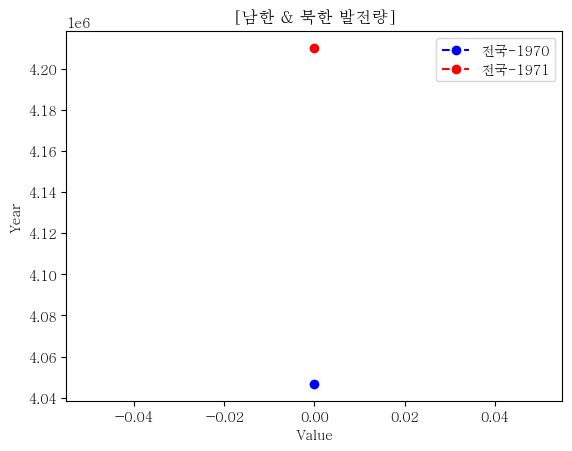

In [432]:
cityDF.iloc[1]['1970']
plt.plot(cityDF.iloc[1]['1970'],'bo--',label='전국-1970')
plt.plot(cityDF.iloc[1]['1971'],'ro--',label='전국-1971')
plt.title("[남한 & 북한 발전량]")
plt.xlabel("Value")
plt.ylabel("Year")
plt.legend()            # 범례 표시
plt.show()
